Sofía Ayala, Eduardo Farca y Daniela Guemez

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
import datetime
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

Vamos a comparar estadisticamente una lista de tickers

In [ ]:
#Descargamos cinco tickers
fechainicial= "2021-12-31"
fechafinal= "2023-10-05"


In [ ]:
femsa=yf.download("FEMSAUBD.MX", fechainicial, fechafinal)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ac= yf.download("AC",fechainicial, fechafinal)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
cuervo=yf.download("CUERVO.MX",fechainicial, fechafinal)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
herdez= yf.download("HERDEZ.MX",fechainicial, fechafinal)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
alsea= yf.download("ALSEA.MX",fechainicial, fechafinal)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
tickers= ["FEMSAUBD.MX", "AC.MX", "CUERVO.MX", "HERDEZ.MX", "ALSEA.MX"] #Lista de tickers
datos= yf.download(tickers, fechainicial, fechafinal) ["Close"]
datos

[*********************100%%**********************]  5 of 5 completed


,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,130.520004,37.950001,51.360001,159.320007,40.480000
2022-01-03,128.520004,39.939999,51.270000,159.110001,39.990002
2022-01-04,130.869995,41.029999,51.139999,161.389999,39.869999
2022-01-05,129.750000,41.900002,50.810001,162.210007,39.700001
2022-01-06,128.740005,41.779999,50.560001,161.800003,39.990002
...,...,...,...,...,...
2023-09-28,158.050003,63.419998,42.560001,189.089996,41.830002
2023-09-29,158.770004,63.599998,41.619999,189.979996,40.619999
2023-10-02,160.149994,62.990002,41.590000,195.759995,40.610001


In [ ]:
#Varianza
varianza= datos.std()**2
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [ ]:
varianza=datos.var()
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [ ]:
#Sacamos la descripción estadística de los datos
datos.describe()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,445.000000,445.000000,445.000000,445.000000,445.000000
mean,150.660922,45.469933,44.517865,159.139775,38.071775
std,17.694222,7.981005,3.470671,20.808200,6.963327
min,118.010002,34.930000,35.450001,121.089996,24.820000
25%,133.050003,38.810001,42.240002,144.570007,31.559999
50%,155.410004,43.270000,44.480000,159.320007,39.500000
75%,164.139999,49.939999,46.520000,173.570007,44.730000
max,181.089996,66.000000,53.400002,199.669998,49.230000


In [ ]:
#Sacamos los rendimientos
rendimientos=datos.pct_change()
rendimientos

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.015323,0.052437,-0.001752,-0.001318,-0.012105
2022-01-04,0.018285,0.027291,-0.002536,0.014330,-0.003001
2022-01-05,-0.008558,0.021204,-0.006453,0.005081,-0.004264
2022-01-06,-0.007784,-0.002864,-0.004920,-0.002528,0.007305
...,...,...,...,...,...
2023-09-28,0.004832,0.001263,-0.016181,-0.001531,0.005529
2023-09-29,0.004556,0.002838,-0.022087,0.004707,-0.028927
2023-10-02,0.008692,-0.009591,-0.000721,0.030424,-0.000246


In [ ]:
#Sacamos en promedio de los rendimientos
rendimientosmean=rendimientos.mean() #Promedio artimetico de rendimientos
rendimientosmean

AC.MX          0.000537
ALSEA.MX       0.001361
CUERVO.MX     -0.000376
FEMSAUBD.MX    0.000562
HERDEZ.MX      0.000182
dtype: float64

In [ ]:
#Varianza de los rendimientos
var=rendimientos.var()*100 #Varianza de rendimientos en porcentaje
var

AC.MX          0.021079
ALSEA.MX       0.035221
CUERVO.MX      0.024660
FEMSAUBD.MX    0.020692
HERDEZ.MX      0.048892
dtype: float64

In [ ]:
#Sacamos la descripción estadística de los rendimientos
rendimientos.describe()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.000537,0.001361,-0.000376,0.000562,0.000182
std,0.014519,0.018767,0.015703,0.014385,0.022112
min,-0.048598,-0.071988,-0.056592,-0.070087,-0.063233
25%,-0.008347,-0.010033,-0.010216,-0.008396,-0.012550
50%,0.000502,0.001660,-0.000275,0.000434,-0.000502
75%,0.008380,0.011904,0.008956,0.008580,0.013467
max,0.070801,0.088256,0.055485,0.088805,0.084856


In [ ]:
#Matriz covarianza
covarianza=rendimientos.cov()
covarianza

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
AC.MX,0.000211,0.000005,0.000036,0.000049,0.000018
ALSEA.MX,0.000005,0.000352,0.000034,0.000055,0.000098
CUERVO.MX,0.000036,0.000034,0.000247,0.000043,0.000062
FEMSAUBD.MX,0.000049,0.000055,0.000043,0.000207,0.000057
HERDEZ.MX,0.000018,0.000098,0.000062,0.000057,0.000489


<Axes: xlabel='Date'>

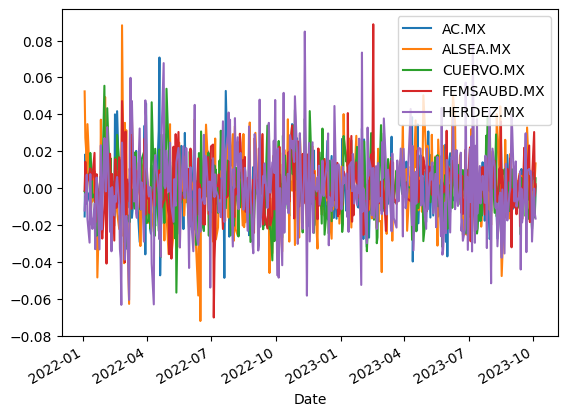

In [ ]:
rendimientos.plot() #Grafica de todos los rendimientos

<Axes: xlabel='Date'>

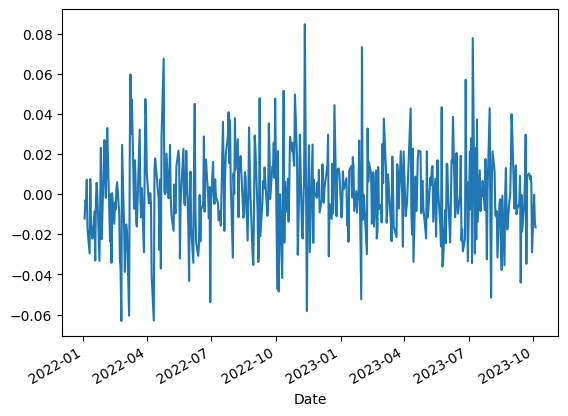

In [ ]:
herdezren=herdez.pct_change()["Close"] #Rendimientos herdez
herdezren.plot() #Grafica lineal

<Axes: >

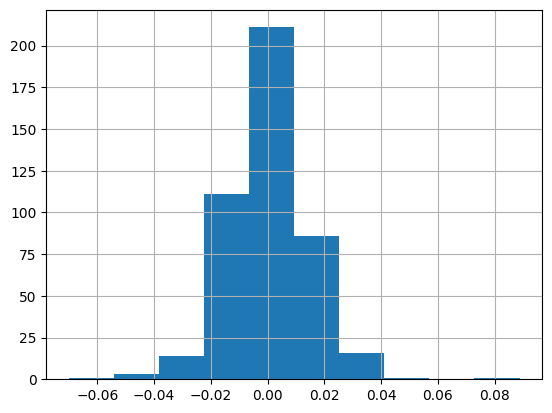

In [ ]:
femsaren=femsa.pct_change()["Close"] #Histograma
femsaren.hist()

In [ ]:
#Descargamos los cetes de 360 días divididos entre 360 para hacerlos diarios
cetesdiario=np.array([
0.0001953,
0.0001961,
0.0001958,
0.0001952,
0.0001958,
0.0001950,
0.0001944,
0.0001922,
0.0001925,
0.0001930,
0.0001931,
0.0001925,
0.0001908,
0.0001907,
0.0001911,
0.0001922,
0.0001929,
0.0001943,
0.0001936,
0.0001938,
0.0001933,
0.0001931,
0.0001930,
0.0001942,
0.0001943,
0.0001961,
0.0002009,
0.0002028,
0.0002042,
0.0002047,
0.0002029,
0.0002018,
0.0002027,
0.0002033,
0.0002033,
0.0002028,
0.0002033,
0.0002039,
0.0002044,
0.0002069,
0.0002064,
0.0002071,
0.0002097,
0.0002149,
0.0002189,
0.0002161,
0.0002195,
0.0002207,
0.0002234,
0.0002250,
0.0002243,
0.0002236,
0.0002230,
0.0002306,
0.0002288,
0.0002283,
0.0002294,
0.0002292,
0.0002303,
0.0002273,
0.0002259,
0.0002283,
0.0002292,
0.0002305,
0.0002317,
0.0002346,
0.0002357,
0.0002367,
0.0002359,
0.0002356,
0.0002364,
0.0002364,
0.0002362,
0.0002367,
0.0002395,
0.0002409,
0.0002444,
0.0002439,
0.0002437,
0.0002441,
0.0002439,
0.0002450,
0.0002434,
0.0002438,
0.0002440,
0.0002436,
0.0002418,
0.0002415,
0.0002425,
0.0002444,
0.0002453,
0.0002461,
0.0002469,
0.0002444,
0.0002460,
0.0002469,
0.0002463,
0.0002453,
0.0002472,
0.0002492,
0.0002492,
0.0002502,
0.0002503,
0.0002520,
0.0002546,
0.0002558,
0.0002581,
0.0002589,
0.0002570,
0.0002597,
0.0002625,
0.0002650,
0.0002647,
0.0002647,
0.0002654,
0.0002653,
0.0002664,
0.0002673,
0.0002664,
0.0002676,
0.0002678,
0.0002678,
0.0002678,
0.0002706,
0.0002692,
0.0002692,
0.0002687,
0.0002687,
0.0002681,
0.0002681,
0.0002679,
0.0002689,
0.0002704,
0.0002721,
0.0002714,
0.0002717,
0.0002728,
0.0002714,
0.0002713,
0.0002692,
0.0002689,
0.0002675,
0.0002673,
0.0002629,
0.0002614,
0.0002615,
0.0002616,
0.0002608,
0.0002611,
0.0002632,
0.0002636,
0.0002647,
0.0002635,
0.0002642,
0.0002645,
0.0002643,
0.0002683,
0.0002686,
0.0002690,
0.0002706,
0.0002713,
0.0002712,
0.0002717,
0.0002733,
0.0002746,
0.0002756,
0.0002772,
0.0002761,
0.0002772,
0.0002761,
0.0002774,
0.0002780,
0.0002770,
0.0002769,
0.0002764,
0.0002767,
0.0002806,
0.0002813,
0.0002830,
0.0002852,
0.0002861,
0.0002876,
0.0002911,
0.0002928,
0.0002956,
0.0003036,
0.0002978,
0.0002985,
0.0002974,
0.0002951,
0.0002956,
0.0002959,
0.0002963,
0.0002957,
0.0002961,
0.0002972,
0.0002967,
0.0002981,
0.0002994,
0.0003006,
0.0003012,
0.0003021,
0.0003055,
0.0003038,
0.0003033,
0.0003027,
0.0003010,
0.0002997,
0.0002994,
0.0003019,
0.0003019,
0.0003031,
0.0003023,
0.0003027,
0.0003022,
0.0003008,
0.0002958,
0.0002967,
0.0002975,
0.0002986,
0.0002981,
0.0003000,
0.0003008,
0.0003016,
0.0003019,
0.0003021,
0.0003023,
0.0003034,
0.0003021,
0.0003027,
0.0003014,
0.0003008,
0.0003013,
0.0003005,
0.0002975,
0.0002972,
0.0002978,
0.0002966,
0.0002974,
0.0002979,
0.0002975,
0.0002980,
0.0002992,
0.0002971,
0.0002972,
0.0002972,
0.0002972,
0.0003056,
0.0003042,
0.0003039,
0.0003053,
0.0003042,
0.0003033,
0.0003033,
0.0003042,
0.0003033,
0.0003028,
0.0003055,
0.0003047,
0.0003049,
0.0003053,
0.0003058,
0.0003065,
0.0003050,
0.0003054,
0.0003062,
0.0003066,
0.0003083,
0.0003081,
0.0003092,
0.0003089,
0.0003089,
0.0003081,
0.0003082,
0.0003067,
0.0003087,
0.0003099,
0.0003109,
0.0003194,
0.0003255,
0.0003283,
0.0003306,
0.0003301,
0.0003306,
0.0003333,
0.0003344,
0.0003269,
0.0003361,
0.0003352,
0.0003367,
0.0003367,
0.0003361,
0.0003368,
0.0003361,
0.0003357,
0.0003351,
0.0003364,
0.0003366,
0.0003306,
0.0003291,
0.0003253,
0.0003248,
0.0003188,
0.0003198,
0.0003185,
0.0003239,
0.0003231,
0.0003246,
0.0003253,
0.0003285,
0.0003297,
0.0003302,
0.0003252,
0.0003253,
0.0003258,
0.0003253,
0.0003255,
0.0003271,
0.0003292,
0.0003278,
0.0003264,
0.0003263,
0.0003267,
0.0003269,
0.0003286,
0.0003274,
0.0003258,
0.0003236,
0.0003228,
0.0003203,
0.0003210,
0.0003217,
0.0003219,
0.0003208,
0.0003203,
0.0003203,
0.0003207,
0.0003197,
0.0003192,
0.0003199,
0.0003205,
0.0003196,
0.0003194,
0.0003196,
0.0003190,
0.0003193,
0.0003197,
0.0003197,
0.0003196,
0.0003194,
0.0003191,
0.0003184,
0.0003181,
0.0003175,
0.0003176,
0.0003178,
0.0003180,
0.0003169,
0.0003161,
0.0003154,
0.0003144,
0.0003142,
0.0003142,
0.0003136,
0.0003131,
0.0003131,
0.0003132,
0.0003125,
0.0003122,
0.0003106,
0.0003096,
0.0003086,
0.0003092,
0.0003095,
0.0003117,
0.0003119,
0.0003124,
0.0003125,
0.0003126,
0.0003139,
0.0003134,
0.0003142,
0.0003167,
0.0003133,
0.0003136,
0.0003134,
0.0003132,
0.0003139,
0.0003142,
0.0003142,
0.0003133,
0.0003134,
0.0003142,
0.0003136,
0.0003133,
0.0003122,
0.0003118,
0.0003119,
0.0003122,
0.0003133,
0.0003131,
0.0003144,
0.0003181,
0.0003150,
0.0003159,
0.0003174,
0.0003183,
0.0003183,
0.0003182,
0.0003189,
0.0003186,
0.0003194,
0.0003187,
0.0003175,
0.0003186,
0.0003186,
0.0003188,
0.0003186,
0.0003189,
0.0003190,
0.0003194,
0.0003200,
0.0003214,
0.0003217,
0.0003216,
0.0003216,
0.0003231,
0.0003229,
0.0003222,
0.0003222,
0.0003222,
0.0003231,
0.0003240,
0.0003239,
0.0003242,
0.0003231,
0.0003235,
0.0003250,
0.0003252,
0.0003237,
0.0003233,
0.0003236,
0.0003254,
0.0003236])

In [ ]:
weights=np.array([.2,.2,.1,.3,.2])

In [ ]:
er=np.dot(weights.T,rendimientos.mean())*360
print(f"Expected return del portafolio: {er*100:.6f}%")

Expected return del portafolio: 19.686327%


In [ ]:
war=rendimientos*weights
rendimientos=rendimientos.dropna()
war=war.sum(axis=1)
excess=war-cetesdiario
averagee=excess.mean()
print(f"Excess return del portafolio: {averagee*100:.6f}%")

Excess return del portafolio: 0.026271%


In [ ]:
var1=np.dot(weights.T,np.dot(covarianza,weights))
print(f"Varianza del portafolio: {var1*100:.6f}%")

Varianza del portafolio: 0.010008%


In [ ]:
desv=np.sqrt(var1)
desv

0.010003834282559354

In [ ]:
sharpe=averagee/desv
print(f"Sharpe ratio del portafolio: {sharpe*100:.6f}%")

Sharpe ratio del portafolio: 2.626052%


In [ ]:
import cvxpy as cp

In [ ]:
#Promedio de los rendimientos
mean=rendimientos.mean()
mean

AC.MX          0.000537
ALSEA.MX       0.001361
CUERVO.MX     -0.000376
FEMSAUBD.MX    0.000562
HERDEZ.MX      0.000182
dtype: float64

In [ ]:
# Número de activos en el portafolio
num_activos = len(rendimientos.columns)

# Definir las variables de decisión (pesos de los activos en el portafolio)
weights = cp.Variable(num_activos)

# Definir la función objetivo (minimizar la varianza del portafolio)
objective = cp.Minimize(cp.quad_form(weights, covarianza))

# Definir las restricciones (la suma de los pesos debe ser igual a 1)
constraints = [cp.sum(weights) == 1, weights >= 0]

prob = cp.Problem(objective, constraints)

prob.solve()

pesos_optimos = weights.value

# Imprimir los resultados
print("Pesos óptimos del portafolio:")
print(pesos_optimos)

# Calcular la varianza del portafolio utilizando los pesos óptimos
varianza_portafolio = np.dot(pesos_optimos.T, np.dot(covarianza, pesos_optimos))
print(f"Varianza del portafolio optimizado: {varianza_portafolio*100:.6f}%")

Pesos óptimos del portafolio:
[0.30627662 0.16067293 0.22243604 0.23324475 0.07736966]
Varianza del portafolio optimizado: 0.008621%


In [ ]:
pesos_optimos.sum()

0.9999999999999999

In [ ]:
oer=np.dot(pesos_optimos.T,rendimientos.mean())*360
print(f"Expected return del portafolio optimizado: {oer*100:.6f}%")

Expected return del portafolio optimizado: 16.001464%


In [ ]:
wr=rendimientos*pesos_optimos
rendimientos=rendimientos.dropna()
wr=wr.sum(axis=1)
excessopt=(wr-cetesdiario).mean()
print(f"Excess return del portafolio optimizado: {excessopt*100:.6f}%")

Excess return del portafolio optimizado: 0.016035%


In [ ]:
desopt=np.sqrt(varianza_portafolio)
sharpeopt=excessopt/desopt
print(f"Sharpe ratio del portafolio optimizado: {sharpeopt*100:.6f}%")

Sharpe ratio del portafolio optimizado: 1.726933%
